In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import pickle, datetime

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed,Convolution2D,Activation
from keras.layers.convolutional import ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop,Adam, SGD
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,AveragePooling2D,
                          GaussianNoise, UpSampling2D, Input)

from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Import the backend
from tensorflow.python.keras.backend import get_session
import tensorflow.keras.backend as K
tf.config.list_physical_devices('GPU')
tf.compat.v1.keras.backend 
#K.tensorflow_backend._get_available_gpus()
import os

In [ ]:
print(os.listdir("/content/drive/MyDrive/Covid-CT-Scan-80-20"))

['train', 'val']


In [ ]:
import tensorflow as tf

#from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout, MaxPooling2D, AveragePooling2D, Dense, Flatten, Input, Conv2D, add, Activation
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,AveragePooling2D,
                          GaussianNoise, UpSampling2D, Input)

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from PIL import Image
import matplotlib.pyplot as plt

import cv2
from imutils import paths
import numpy as np
import os
import time
import warnings
warnings.filterwarnings("ignore")
print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.8.0


In [ ]:
import requests
import tensorflow as tf

import tensorflow.keras.utils as np_utils


train_dir = '/content/drive/MyDrive/Covid-CT-Scan-80-20/train'
test_dir = '/content/drive/MyDrive/Covid-CT-Scan-80-20/val'

image_size = 224
H=image_size
W= image_size
batch_size = 32


In [ ]:
Train_img = []
CT_Train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/Covid-CT-Scan-80-20/train/*"):
    CT_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (H, W))
        Train_img.append(img)
        CT_Train_labels.append(CT_label)
Train_img = np.array(Train_img)
CT_Train_labels = np.array(CT_Train_labels)

In [ ]:
CT_labels_id = {v:i for i,v in enumerate(np.unique(CT_Train_labels))}
id_to_label = {v: k for k, v in CT_labels_id.items()}
CT_Train_CT_labels_ids = np.array([CT_labels_id[x] for x in CT_Train_labels])

In [ ]:
Train_img.shape, CT_Train_CT_labels_ids.shape, CT_Train_labels.shape

((1984, 224, 224, 3), (1984,), (1984,))

In [ ]:
# test
Test_img = []
CT_Test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/Covid-CT-Scan-80-20/val/*"):
    CT_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (H, W))          
        Test_img.append(img)
        CT_Test_labels.append(CT_label)
Test_img = np.array(Test_img)
CT_Test_labels = np.array(CT_Test_labels)

In [ ]:
CT_labels_id = {v:i for i,v in enumerate(np.unique(CT_Test_labels))}
id_to_label = {v: k for k, v in CT_labels_id.items()}
Test_CT_labels_ids = np.array([CT_labels_id[x] for x in CT_Test_labels])

In [ ]:
Test_img.shape, Test_CT_labels_ids.shape

((497, 224, 224, 3), (497,))

In [ ]:
x_train, y_train, x_test, y_test, N_CATEGORY =Train_img,CT_Train_labels,Test_img,CT_Test_labels,len(CT_labels_id)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, N_CATEGORY)

(1984, 224, 224, 3) (1984,) (497, 224, 224, 3) (497,) 2


In [ ]:
model = Sequential(name="covid-ct-scan")
model.add(Conv2D(8,(3,3),activation = "relu",padding ="same",kernel_initializer="he_normal", input_shape=(H,W,3)))

model.add(BatchNormalization())

model.add(AveragePooling2D(pool_size = (2,2), strides=2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(16,(3,3),activation = "relu",padding ="same",kernel_initializer="he_normal"))

model.add(BatchNormalization())

model.add(AveragePooling2D(pool_size = (2,2), strides=2))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(32,(3,3),activation = "relu", padding ="same",kernel_initializer="he_normal"))

model.add(BatchNormalization())

model.add(AveragePooling2D(pool_size = (2,2), strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = "relu",padding ="same",kernel_initializer="he_normal"))

model.add(BatchNormalization())

model.add(AveragePooling2D(pool_size = (2,2), strides=2))
model.add(Dropout(0.2))
#model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2,activation="softmax"))

In [ ]:
model.summary()

Model: "covid-ct-scan"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 batch_normalization_6 (Batc  (None, 224, 224, 8)      32        
 hNormalization)                                                 
                                                                 
 average_pooling2d_4 (Averag  (None, 112, 112, 8)      0         
 ePooling2D)                                                     
                                                                 
 dropout_5 (Dropout)         (None, 112, 112, 8)       0         
                                                                 
 batch_normalization_7 (Batc  (None, 112, 112, 8)      32        
 hNormalization)                                                 
                                                     

In [ ]:
model.compile(optimizer=Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'AUC'])

In [ ]:
from keras.callbacks import Callback
class TerminateOnBaseline(Callback):
    """Callback that terminates training when either acc or val_acc reaches a specified baseline, 
    """
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True
callbacks = [TerminateOnBaseline(monitor='val_accuracy', baseline=1)]

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(H, W),
                                              batch_size=32,
                                              class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(H, W),
                                            batch_size=32,
                                            class_mode="categorical")

Found 1984 images belonging to 2 classes.
Found 497 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_data,
                    validation_data = test_data,
                    epochs=200,
                    callbacks=[TerminateOnBaseline(monitor='val_accuracy', baseline=0.985)])

Epoch 1/200
62/62 [==============================] - 20s 305ms/step - loss: 0.4967 - accuracy: 0.7732 - auc: 0.8533 - val_loss: 0.9515 - val_accuracy: 0.4990 - val_auc: 0.5003
Epoch 2/200
62/62 [==============================] - 18s 297ms/step - loss: 0.2899 - accuracy: 0.8816 - auc: 0.9509 - val_loss: 3.0243 - val_accuracy: 0.5050 - val_auc: 0.4872
Epoch 3/200
62/62 [==============================] - 18s 296ms/step - loss: 0.2210 - accuracy: 0.9083 - auc: 0.9702 - val_loss: 4.1170 - val_accuracy: 0.5050 - val_auc: 0.5071
Epoch 4/200
62/62 [==============================] - 18s 295ms/step - loss: 0.1625 - accuracy: 0.9400 - auc: 0.9850 - val_loss: 3.1599 - val_accuracy: 0.5050 - val_auc: 0.5599
Epoch 5/200
62/62 [==============================] - 19s 302ms/step - loss: 0.1385 - accuracy: 0.9441 - auc: 0.9890 - val_loss: 1.9230 - val_accuracy: 0.5332 - val_auc: 0.6536
Epoch 6/200
62/62 [==============================] - 19s 308ms/step - loss: 0.1060 - accuracy: 0.9577 - auc: 0.9939 - va

In [ ]:
#model.save('/content/drive/MyDrive/h5-file/Covid-CT-SCan-CNN-SVM.h5') 

In [ ]:
#Fully-Connected layer as the features 
layer_name = 'flatten_1'
FC_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
F=12544

In [ ]:
#Find the Features
i=0
features=np.zeros(shape=(x_train.shape[0],F))
for directory_path in glob.glob("/content/drive/MyDrive/Covid-CT-Scan-80-20/train/*"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
        img = cv2.resize(img, (H, W))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = np.expand_dims(img, axis=0)
        FC_output = FC_layer_model.predict(img)
        features[i]=FC_output
        i+=1

In [ ]:
#Name the feature rows as f_0, f_1, f_2...
feature_col=[]
for i in range(F):
    feature_col.append("f_"+str(i))
    i+=1

In [ ]:
#Create DataFrame with features and coloumn name
train_features=pd.DataFrame(data=features,columns=feature_col)
feature_col = np.array(feature_col)

train_class = list(np.unique(CT_Train_CT_labels_ids))
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', CT_Train_CT_labels_ids.shape)
train_class

Training Features Shape: (1984, 12544)
Training Labels Shape: (1984, 1)


[0, 1]

In [ ]:
#Find the Features from CNN FC layer
i=0
features_test=np.zeros(shape=(y_test.shape[0],F))
for directory_path in glob.glob("/content/drive/MyDrive/Covid-CT-Scan-80-20/val//*"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
        img = cv2.resize(img, (H, W))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = np.expand_dims(img, axis=0)
        FC_output = FC_layer_model.predict(img)
        features_test[i]=FC_output
        i+=1

In [ ]:
#Create DataFrame with features and coloumn name
test_features=pd.DataFrame(data=features_test,columns=feature_col)
feature_col = np.array(feature_col)

print('Test Features Shape:', test_features.shape)
print('Test Labels Shape:', Test_CT_labels_ids.shape)

Test Features Shape: (497, 12544)
Test Labels Shape: (497, 1)


In [ ]:
All_features=train_features.append(test_features, ignore_index=True)
CT_Train_CT_labels_ids=pd.DataFrame(data=CT_Train_CT_labels_ids)
Test_CT_labels_ids=pd.DataFrame(data=Test_CT_labels_ids)

All_label= CT_Train_CT_labels_ids.append(Test_CT_labels_ids, ignore_index=True)
All_features.shape
All_label.shape
y=All_label

In [ ]:
X=All_features
y=All_label

In [ ]:
from sklearn.model_selection import train_test_split

x_train1,  x_test1, y_train1, y_test1 =train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model8 = SVC(C=300, kernel='rbf')

model8.fit(x_train1, y_train1)

SVC(C=300)

In [ ]:
a=model8.score(x_train1, y_train1)
a

1.0

TRAIN: [  50   51   52 ... 2478 2479 2480] TEST: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49  983  984  985  986  987  988
  989  990  991  992  993  994  995  996  997  998  999 1000 1001 1002
 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016
 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030
 1031 1032]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



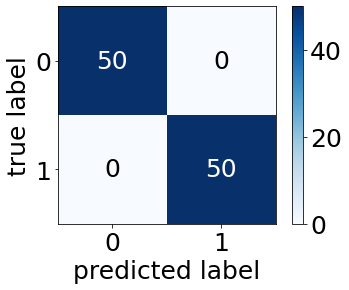

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [  50   51   52   53   54   55   56   57   58   59   60   61   62   63
   64   65   66   67   68   69   70   71   72   73   74   75   76   77
   78   79   80   81   82   83   84   85   86   87   88   89   90   91
   92   93   94   95   96   97   98   99 1033 1034 1035 1036 1037 1038
 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052
 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066
 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080
 1081 1082]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.92      0.98      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



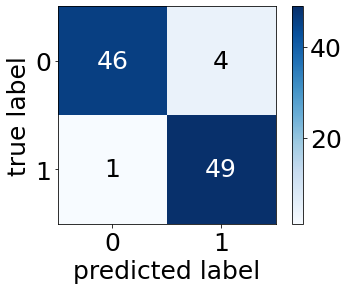

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 100  101  102  103  104  105  106  107  108  109  110  111  112  113
  114  115  116  117  118  119  120  121  122  123  124  125  126  127
  128  129  130  131  132  133  134  135  136  137  138  139  140  141
  142  143  144  145  146  147  148  149 1083 1084 1085 1086 1087 1088
 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102
 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116
 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130
 1131 1132]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



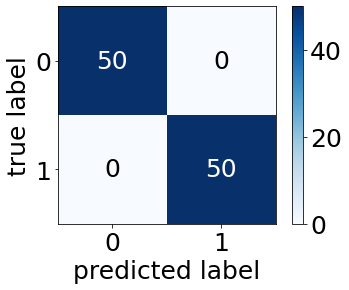

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 150  151  152  153  154  155  156  157  158  159  160  161  162  163
  164  165  166  167  168  169  170  171  172  173  174  175  176  177
  178  179  180  181  182  183  184  185  186  187  188  189  190  191
  192  193  194  195  196  197  198  199 1133 1134 1135 1136 1137 1138
 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152
 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166
 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180
 1181 1182]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.93      1.00      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



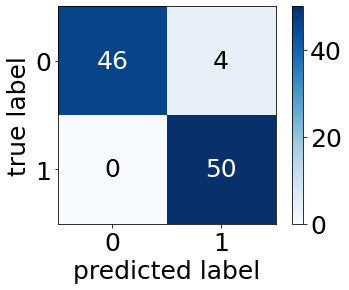

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 200  201  202  203  204  205  206  207  208  209  210  211  212  213
  214  215  216  217  218  219  220  221  222  223  224  225  226  227
  228  229  230  231  232  233  234  235  236  237  238  239  240  241
  242  243  244  245  246  247  248 1183 1184 1185 1186 1187 1188 1189
 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203
 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217
 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231
 1232 1233]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        51
           1       0.98      0.90      0.94        49

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



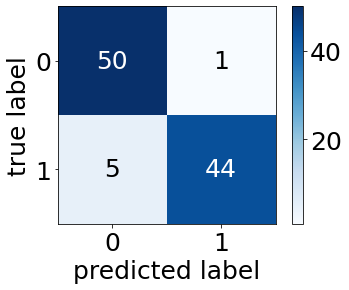

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 249  250  251  252  253  254  255  256  257  258  259  260  261  262
  263  264  265  266  267  268  269  270  271  272  273  274  275  276
  277  278  279  280  281  282  283  284  285  286  287  288  289  290
  291  292  293  294  295  296  297 1234 1235 1236 1237 1238 1239 1240
 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254
 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268
 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282
 1283 1284]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      0.86      0.92        49

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100



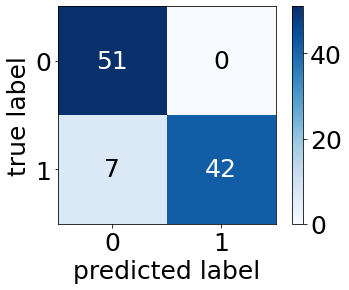

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 298  299  300  301  302  303  304  305  306  307  308  309  310  311
  312  313  314  315  316  317  318  319  320  321  322  323  324  325
  326  327  328  329  330  331  332  333  334  335  336  337  338  339
  340  341  342  343  344  345  346 1285 1286 1287 1288 1289 1290 1291
 1292 1293 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305
 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319
 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333
 1334]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        50
           1       0.94      0.90      0.92        49

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99



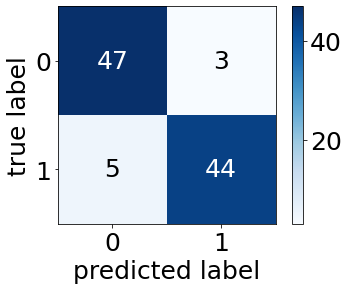

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 347  348  349  350  351  352  353  354  355  356  357  358  359  360
  361  362  363  364  365  366  367  368  369  370  371  372  373  374
  375  376  377  378  379  380  381  382  383  384  385  386  387  388
  389  390  391  392  393  394  395 1335 1336 1337 1338 1339 1340 1341
 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355
 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369
 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383
 1384]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        49

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



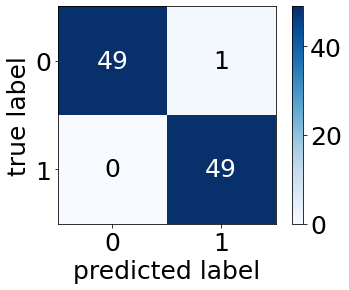

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 396  397  398  399  400  401  402  403  404  405  406  407  408  409
  410  411  412  413  414  415  416  417  418  419  420  421  422  423
  424  425  426  427  428  429  430  431  432  433  434  435  436  437
  438  439  440  441  442  443  444 1385 1386 1387 1388 1389 1390 1391
 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405
 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419
 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433
 1434]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.90      0.96      0.93        49

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



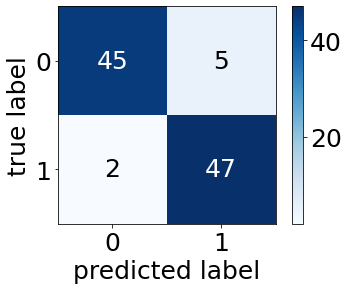

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 445  446  447  448  449  450  451  452  453  454  455  456  457  458
  459  460  461  462  463  464  465  466  467  468  469  470  471  472
  473  474  475  476  477  478  479  480  481  482  483  484  485  486
  487  488  489  490  491  492  493 1435 1436 1437 1438 1439 1440 1441
 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455
 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469
 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483
 1484]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        49

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



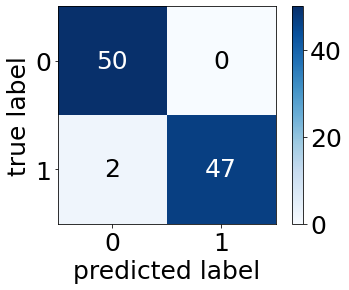

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 494  495  496  497  498  499  500  501  502  503  504  505  506  507
  508  509  510  511  512  513  514  515  516  517  518  519  520  521
  522  523  524  525  526  527  528  529  530  531  532  533  534  535
  536  537  538  539  540  541  542 1485 1486 1487 1488 1489 1490 1491
 1492 1493 1494 1495 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505
 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515 1516 1517 1518 1519
 1520 1521 1522 1523 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533
 1534]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        49

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



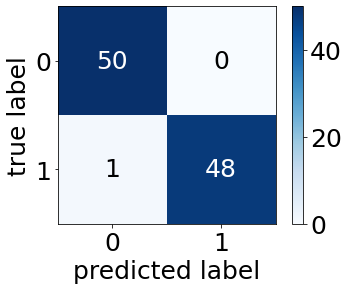

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 543  544  545  546  547  548  549  550  551  552  553  554  555  556
  557  558  559  560  561  562  563  564  565  566  567  568  569  570
  571  572  573  574  575  576  577  578  579  580  581  582  583  584
  585  586  587  588  589  590  591 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        50
           1       0.87      0.92      0.89        49

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99



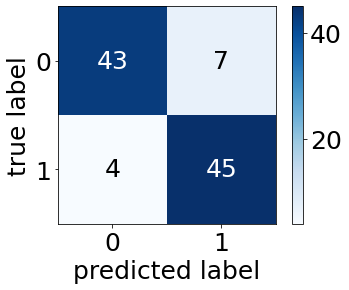

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 592  593  594  595  596  597  598  599  600  601  602  603  604  605
  606  607  608  609  610  611  612  613  614  615  616  617  618  619
  620  621  622  623  624  625  626  627  628  629  630  631  632  633
  634  635  636  637  638  639  640 1585 1586 1587 1588 1589 1590 1591
 1592 1593 1594 1595 1596 1597 1598 1599 1600 1601 1602 1603 1604 1605
 1606 1607 1608 1609 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619
 1620 1621 1622 1623 1624 1625 1626 1627 1628 1629 1630 1631 1632 1633
 1634]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      0.92      0.96        49

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99



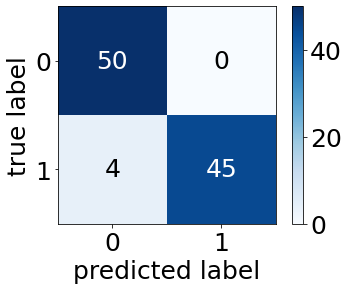

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 641  642  643  644  645  646  647  648  649  650  651  652  653  654
  655  656  657  658  659  660  661  662  663  664  665  666  667  668
  669  670  671  672  673  674  675  676  677  678  679  680  681  682
  683  684  685  686  687  688  689 1635 1636 1637 1638 1639 1640 1641
 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655
 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669
 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682 1683
 1684]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        50
           1       0.81      0.90      0.85        49

    accuracy                           0.85        99
   macro avg       0.85      0.85      0.85        99
weighted avg       0.85      0.85      0.85        99



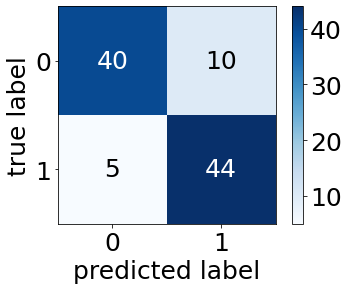

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 690  691  692  693  694  695  696  697  698  699  700  701  702  703
  704  705  706  707  708  709  710  711  712  713  714  715  716  717
  718  719  720  721  722  723  724  725  726  727  728  729  730  731
  732  733  734  735  736  737  738 1685 1686 1687 1688 1689 1690 1691
 1692 1693 1694 1695 1696 1697 1698 1699 1700 1701 1702 1703 1704 1705
 1706 1707 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718 1719
 1720 1721 1722 1723 1724 1725 1726 1727 1728 1729 1730 1731 1732 1733
 1734]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.90      0.96      0.93        49

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



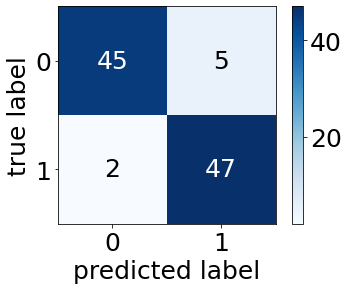

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 739  740  741  742  743  744  745  746  747  748  749  750  751  752
  753  754  755  756  757  758  759  760  761  762  763  764  765  766
  767  768  769  770  771  772  773  774  775  776  777  778  779  780
  781  782  783  784  785  786  787 1735 1736 1737 1738 1739 1740 1741
 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753 1754 1755
 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767 1768 1769
 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780 1781 1782 1783
 1784]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      0.96      0.96        49

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99



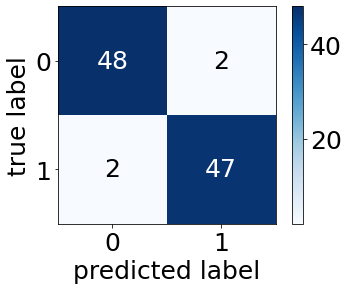

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 788  789  790  791  792  793  794  795  796  797  798  799  800  801
  802  803  804  805  806  807  808  809  810  811  812  813  814  815
  816  817  818  819  820  821  822  823  824  825  826  827  828  829
  830  831  832  833  834  835  836 1785 1786 1787 1788 1789 1790 1791
 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805
 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819
 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833
 1834]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.94      0.98      0.96        49

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99



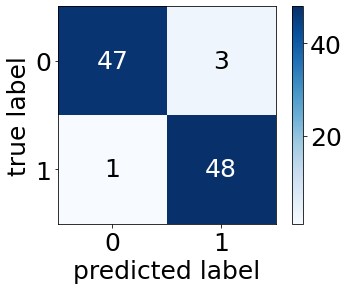

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 837  838  839  840  841  842  843  844  845  846  847  848  849  850
  851  852  853  854  855  856  857  858  859  860  861  862  863  864
  865  866  867  868  869  870  871  872  873  874  875  876  877  878
  879  880  881  882  883  884  885 1835 1836 1837 1838 1839 1840 1841
 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855
 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869
 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.96      0.94      0.95        49

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



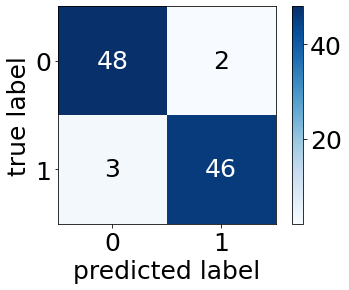

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 886  887  888  889  890  891  892  893  894  895  896  897  898  899
  900  901  902  903  904  905  906  907  908  909  910  911  912  913
  914  915  916  917  918  919  920  921  922  923  924  925  926  927
  928  929  930  931  932  933  934 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        49

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



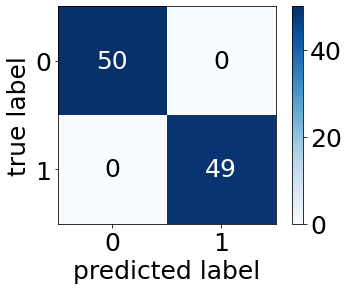

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 935  936  937  938  939  940  941  942  943  944  945  946  947  948
  949  950  951  952  953  954  955  956  957  958  959  960  961  962
  963  964  965  966  967  968  969  970  971  972  973  974  975  976
  977  978  979  980  981  982 1935 1936 1937 1938 1939 1940 1941 1942
 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 2230]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.98      0.96      0.97        49

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



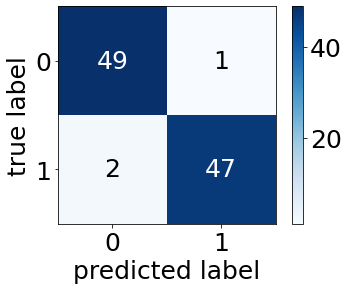

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026
 2027 2028 2029 2030 2031 2032 2033 2231 2232 2233 2234 2235 2236 2237
 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251
 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265
 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279
 2280]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        49

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



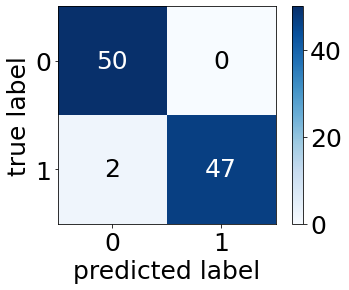

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047
 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061
 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075
 2076 2077 2078 2079 2080 2081 2082 2281 2282 2283 2284 2285 2286 2287
 2288 2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301
 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315
 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329
 2330]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.94      0.97        49

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



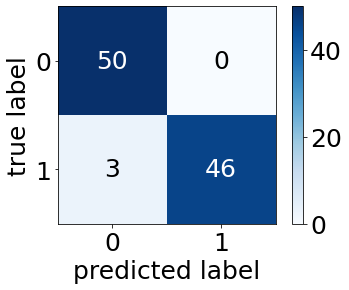

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096
 2097 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110
 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124
 2125 2126 2127 2128 2129 2130 2131 2331 2332 2333 2334 2335 2336 2337
 2338 2339 2340 2341 2342 2343 2344 2345 2346 2347 2348 2349 2350 2351
 2352 2353 2354 2355 2356 2357 2358 2359 2360 2361 2362 2363 2364 2365
 2366 2367 2368 2369 2370 2371 2372 2373 2374 2375 2376 2377 2378 2379
 2380]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.92      0.98      0.95        49

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



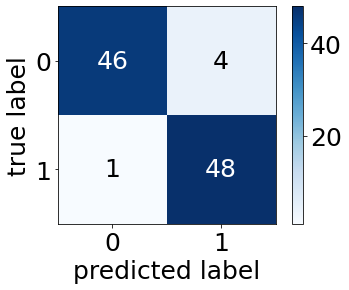

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [2132 2133 2134 2135 2136 2137 2138 2139 2140 2141 2142 2143 2144 2145
 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159
 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173
 2174 2175 2176 2177 2178 2179 2180 2381 2382 2383 2384 2385 2386 2387
 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397 2398 2399 2400 2401
 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411 2412 2413 2414 2415
 2416 2417 2418 2419 2420 2421 2422 2423 2424 2425 2426 2427 2428 2429
 2430]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.96      1.00      0.98        49

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



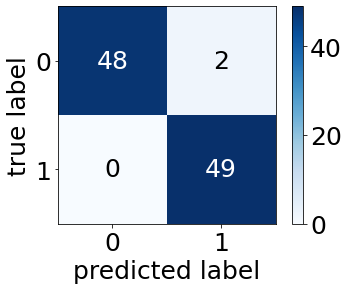

TRAIN: [   0    1    2 ... 2428 2429 2430] TEST: [2181 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194
 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208
 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222
 2223 2224 2225 2226 2227 2228 2229 2431 2432 2433 2434 2435 2436 2437
 2438 2439 2440 2441 2442 2443 2444 2445 2446 2447 2448 2449 2450 2451
 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463 2464 2465
 2466 2467 2468 2469 2470 2471 2472 2473 2474 2475 2476 2477 2478 2479
 2480]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        49

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



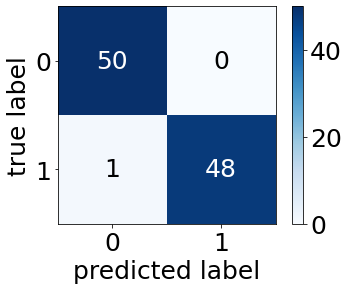

[1.0, 0.95, 1.0, 0.96, 0.94, 0.93, 0.9191919191919192, 0.98989898989899, 0.9292929292929293, 0.9797979797979798, 0.98989898989899, 0.8888888888888888, 0.9595959595959596, 0.8484848484848485, 0.9292929292929293, 0.9595959595959596, 0.9595959595959596, 0.9494949494949495, 1.0, 0.9696969696969697, 0.9797979797979798, 0.9696969696969697, 0.9494949494949495, 0.9797979797979798, 0.98989898989899]
[array([1., 1.]), array([0.92, 0.98]), array([1., 1.]), array([0.92, 1.  ]), array([0.98039216, 0.89795918]), array([1.        , 0.85714286]), array([0.94      , 0.89795918]), array([0.98, 1.  ]), array([0.9       , 0.95918367]), array([1.        , 0.95918367]), array([1.        , 0.97959184]), array([0.86      , 0.91836735]), array([1.        , 0.91836735]), array([0.8       , 0.89795918]), array([0.9       , 0.95918367]), array([0.96      , 0.95918367]), array([0.94      , 0.97959184]), array([0.96      , 0.93877551]), array([1., 1.]), array([0.98      , 0.95918367]), array([1.        , 0.95918367

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef
#from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
skf = StratifiedKFold(n_splits=25)
skf.get_n_splits(X, y)

#print(skf)
accuracy=[]
pre=[]
rec=[]
F1=[]
mcc=[]
kappa=[]
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    model8.fit(X_train1, y_train1)
    y_pred8 = model8.predict(X_test1)
    scores = accuracy_score(y_pred8,y_test1)    
    scores1=precision_score(y_pred8,y_test1, average=None)
    scores2=recall_score(y_pred8,y_test1, average=None)
    scores3=f1_score(y_pred8,y_test1, average=None)
    
    accuracy.append(scores)
    pre.append(scores1)
    rec.append(scores2)
    F1.append(scores3)
    matrix=classification_report(y_test1, y_pred8)

    print(matrix)
    matrix1=confusion_matrix(y_test1, y_pred8)
    plt.rcParams.update({'font.size': 25})
    fig, ax = plot_confusion_matrix(conf_mat=matrix1,
                                    colorbar=True,
                                    show_absolute=True,
                                    show_normed=False
                                    )
    plt.show()
    mcc_scores=matthews_corrcoef (y_test1, y_pred8)
    kappa_scores=cohen_kappa_score(y_test1, y_pred8)
    mcc.append(mcc_scores)
    kappa.append(kappa_scores)
print(accuracy)
print(pre)
print(rec)
print(F1)
print(mcc)
print(kappa)

In [ ]:
np.array(accuracy).mean(),np.array(pre).mean(), np.array(rec).mean(), np.array(F1).mean(), np.array(mcc).mean(), np.array(kappa).mean()

(0.9568565656565656,
 0.9567833533413365,
 0.9583339303287757,
 0.9567931712704527,
 0.9151129310456322,
 0.9136981249532039)

TRAIN: [  62   63   64 ... 2478 2479 2480] TEST: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61  983  984  985  986  987  988  989  990
  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003 1004
 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018
 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032
 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.98      0.98      0.98        62

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98 

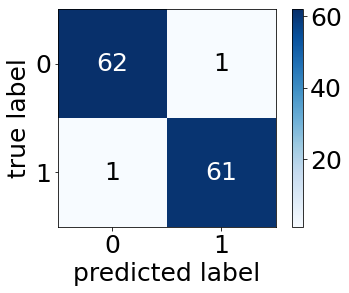

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [  62   63   64   65   66   67   68   69   70   71   72   73   74   75
   76   77   78   79   80   81   82   83   84   85   86   87   88   89
   90   91   92   93   94   95   96   97   98   99  100  101  102  103
  104  105  106  107  108  109  110  111  112  113  114  115  116  117
  118  119  120  121  122  123 1046 1047 1048 1049 1050 1051 1052 1053
 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067
 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081
 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095
 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        62
           1       0.92      0.94      0.93        62

    accuracy                           0.93       124
   macro avg       0.93      0.93      0.93       124
weighted avg       0.93      0.93      0.93      

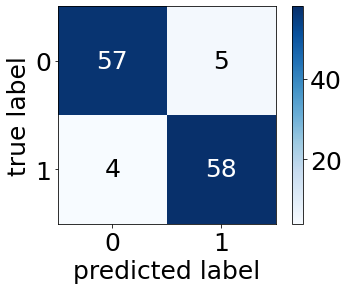

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 124  125  126  127  128  129  130  131  132  133  134  135  136  137
  138  139  140  141  142  143  144  145  146  147  148  149  150  151
  152  153  154  155  156  157  158  159  160  161  162  163  164  165
  166  167  168  169  170  171  172  173  174  175  176  177  178  179
  180  181  182  183  184  185 1108 1109 1110 1111 1112 1113 1114 1115
 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129
 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143
 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157
 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        62
           1       0.86      1.00      0.93        62

    accuracy                           0.92       124
   macro avg       0.93      0.92      0.92       124
weighted avg       0.93      0.92      0.92      

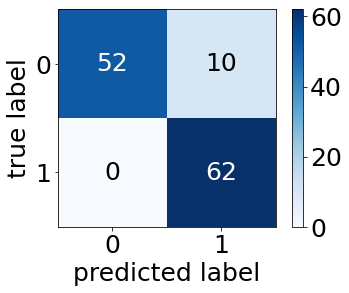

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 186  187  188  189  190  191  192  193  194  195  196  197  198  199
  200  201  202  203  204  205  206  207  208  209  210  211  212  213
  214  215  216  217  218  219  220  221  222  223  224  225  226  227
  228  229  230  231  232  233  234  235  236  237  238  239  240  241
  242  243  244  245  246  247 1170 1171 1172 1173 1174 1175 1176 1177
 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191
 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205
 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219
 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        62
           1       0.86      0.89      0.87        62

    accuracy                           0.87       124
   macro avg       0.87      0.87      0.87       124
weighted avg       0.87      0.87      0.87      

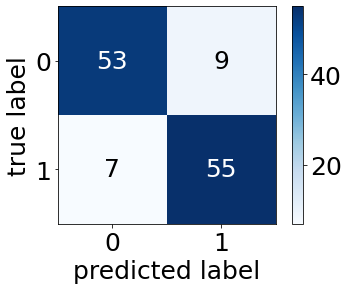

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 248  249  250  251  252  253  254  255  256  257  258  259  260  261
  262  263  264  265  266  267  268  269  270  271  272  273  274  275
  276  277  278  279  280  281  282  283  284  285  286  287  288  289
  290  291  292  293  294  295  296  297  298  299  300  301  302  303
  304  305  306  307  308  309 1232 1233 1234 1235 1236 1237 1238 1239
 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253
 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267
 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281
 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        62
           1       0.87      0.89      0.88        62

    accuracy                           0.88       124
   macro avg       0.88      0.88      0.88       124
weighted avg       0.88      0.88      0.88      

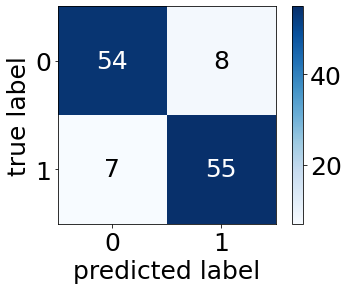

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 310  311  312  313  314  315  316  317  318  319  320  321  322  323
  324  325  326  327  328  329  330  331  332  333  334  335  336  337
  338  339  340  341  342  343  344  345  346  347  348  349  350  351
  352  353  354  355  356  357  358  359  360  361  362  363  364  365
  366  367  368  369  370  371 1294 1295 1296 1297 1298 1299 1300 1301
 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315
 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329
 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343
 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        62
           1       0.95      0.94      0.94        62

    accuracy                           0.94       124
   macro avg       0.94      0.94      0.94       124
weighted avg       0.94      0.94      0.94      

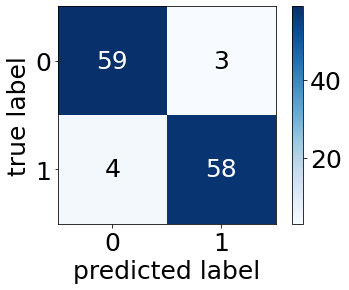

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 372  373  374  375  376  377  378  379  380  381  382  383  384  385
  386  387  388  389  390  391  392  393  394  395  396  397  398  399
  400  401  402  403  404  405  406  407  408  409  410  411  412  413
  414  415  416  417  418  419  420  421  422  423  424  425  426  427
  428  429  430  431  432  433 1356 1357 1358 1359 1360 1361 1362 1363
 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377
 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391
 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405
 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        62
           1       0.92      0.95      0.94        62

    accuracy                           0.94       124
   macro avg       0.94      0.94      0.94       124
weighted avg       0.94      0.94      0.94      

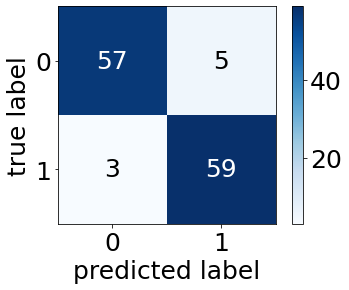

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 434  435  436  437  438  439  440  441  442  443  444  445  446  447
  448  449  450  451  452  453  454  455  456  457  458  459  460  461
  462  463  464  465  466  467  468  469  470  471  472  473  474  475
  476  477  478  479  480  481  482  483  484  485  486  487  488  489
  490  491  492  493  494  495 1418 1419 1420 1421 1422 1423 1424 1425
 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439
 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453
 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467
 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.95      0.98      0.97        62

    accuracy                           0.97       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.97      0.97      0.97      

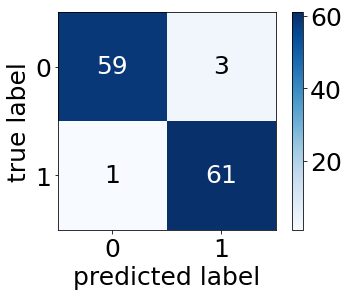

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 496  497  498  499  500  501  502  503  504  505  506  507  508  509
  510  511  512  513  514  515  516  517  518  519  520  521  522  523
  524  525  526  527  528  529  530  531  532  533  534  535  536  537
  538  539  540  541  542  543  544  545  546  547  548  549  550  551
  552  553  554  555  556  557 1480 1481 1482 1483 1484 1485 1486 1487
 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499 1500 1501
 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515
 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527 1528 1529
 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.98      0.97      0.98        62

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98      

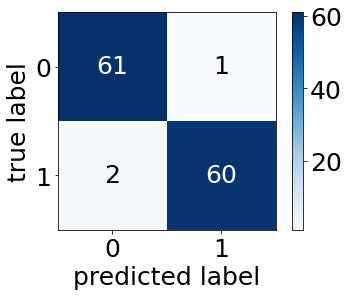

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 558  559  560  561  562  563  564  565  566  567  568  569  570  571
  572  573  574  575  576  577  578  579  580  581  582  583  584  585
  586  587  588  589  590  591  592  593  594  595  596  597  598  599
  600  601  602  603  604  605  606  607  608  609  610  611  612  613
  614  615  616  617  618 1542 1543 1544 1545 1546 1547 1548 1549 1550
 1551 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564
 1565 1566 1567 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578
 1579 1580 1581 1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592
 1593 1594 1595 1596 1597 1598 1599 1600 1601 1602 1603 1604]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        63
           1       0.95      0.92      0.93        61

    accuracy                           0.94       124
   macro avg       0.94      0.94      0.94       124
weighted avg       0.94      0.94      0.94      

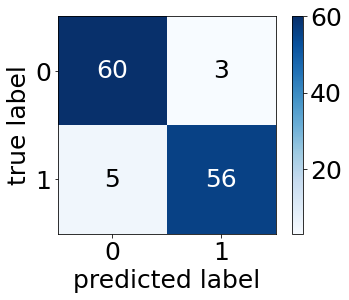

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 619  620  621  622  623  624  625  626  627  628  629  630  631  632
  633  634  635  636  637  638  639  640  641  642  643  644  645  646
  647  648  649  650  651  652  653  654  655  656  657  658  659  660
  661  662  663  664  665  666  667  668  669  670  671  672  673  674
  675  676  677  678  679 1605 1606 1607 1608 1609 1610 1611 1612 1613
 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627
 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641
 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655
 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        63
           1       0.95      0.90      0.92        61

    accuracy                           0.93       124
   macro avg       0.93      0.93      0.93       124
weighted avg       0.93      0.93      0.93      

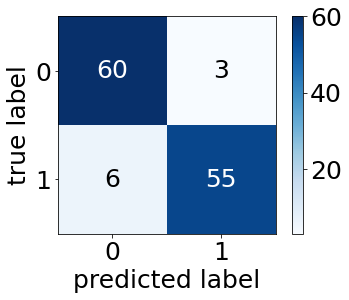

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 680  681  682  683  684  685  686  687  688  689  690  691  692  693
  694  695  696  697  698  699  700  701  702  703  704  705  706  707
  708  709  710  711  712  713  714  715  716  717  718  719  720  721
  722  723  724  725  726  727  728  729  730  731  732  733  734  735
  736  737  738  739  740 1668 1669 1670 1671 1672 1673 1674 1675 1676
 1677 1678 1679 1680 1681 1682 1683 1684 1685 1686 1687 1688 1689 1690
 1691 1692 1693 1694 1695 1696 1697 1698 1699 1700 1701 1702 1703 1704
 1705 1706 1707 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718
 1719 1720 1721 1722 1723 1724 1725 1726 1727 1728 1729 1730]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.92      0.97      0.94        61

    accuracy                           0.94       124
   macro avg       0.94      0.94      0.94       124
weighted avg       0.94      0.94      0.94      

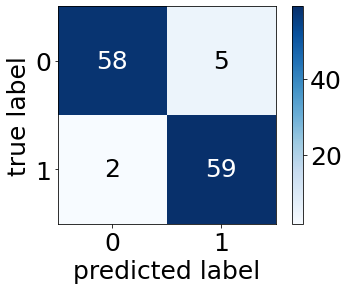

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 741  742  743  744  745  746  747  748  749  750  751  752  753  754
  755  756  757  758  759  760  761  762  763  764  765  766  767  768
  769  770  771  772  773  774  775  776  777  778  779  780  781  782
  783  784  785  786  787  788  789  790  791  792  793  794  795  796
  797  798  799  800  801 1731 1732 1733 1734 1735 1736 1737 1738 1739
 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753
 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767
 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780 1781
 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.97      0.95      0.96        61

    accuracy                           0.96       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.96      0.96      0.96      

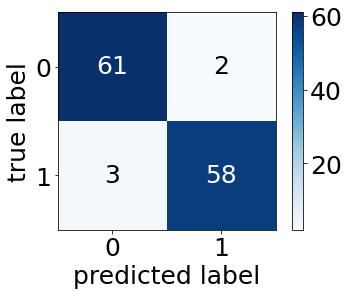

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 802  803  804  805  806  807  808  809  810  811  812  813  814  815
  816  817  818  819  820  821  822  823  824  825  826  827  828  829
  830  831  832  833  834  835  836  837  838  839  840  841  842  843
  844  845  846  847  848  849  850  851  852  853  854  855  856  857
  858  859  860  861  862 1794 1795 1796 1797 1798 1799 1800 1801 1802
 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816
 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830
 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844
 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        63
           1       0.85      0.93      0.89        61

    accuracy                           0.89       124
   macro avg       0.89      0.89      0.89       124
weighted avg       0.89      0.89      0.89      

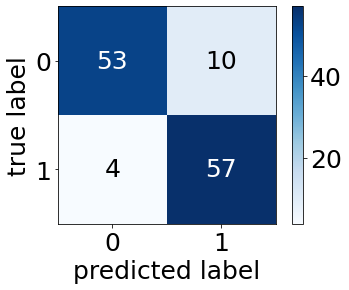

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 863  864  865  866  867  868  869  870  871  872  873  874  875  876
  877  878  879  880  881  882  883  884  885  886  887  888  889  890
  891  892  893  894  895  896  897  898  899  900  901  902  903  904
  905  906  907  908  909  910  911  912  913  914  915  916  917  918
  919  920  921  922  923 1857 1858 1859 1860 1861 1862 1863 1864 1865
 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879
 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.97      1.00      0.98        61

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98      

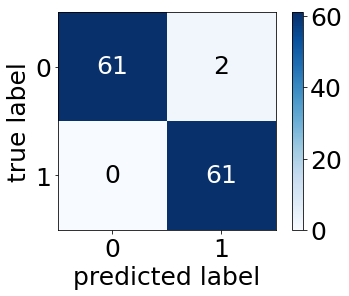

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 924  925  926  927  928  929  930  931  932  933  934  935  936  937
  938  939  940  941  942  943  944  945  946  947  948  949  950  951
  952  953  954  955  956  957  958  959  960  961  962  963  964  965
  966  967  968  969  970  971  972  973  974  975  976  977  978  979
  980  981  982 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1984 1985]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.98      0.97      0.98        61

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98      

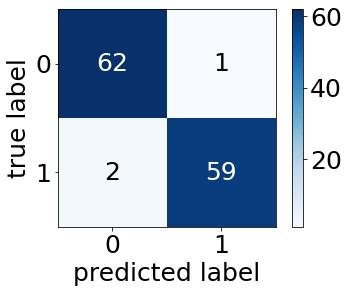

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [1983 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026
 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040
 2041 2042 2043 2044 2045 2046 2230 2231 2232 2233 2234 2235 2236 2237
 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251
 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265
 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279
 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290 2291]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       1.00      0.95      0.97        61

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98      

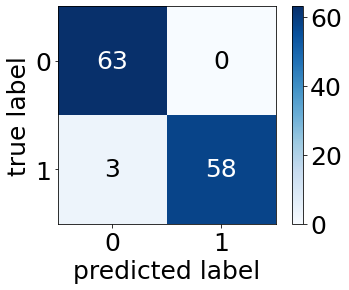

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060
 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074
 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088
 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100 2101 2102
 2103 2104 2105 2106 2107 2292 2293 2294 2295 2296 2297 2298 2299 2300
 2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314
 2315 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328
 2329 2330 2331 2332 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342
 2343 2344 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.98      0.93      0.96        61

    accuracy                           0.96       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.96      0.96      0.96      

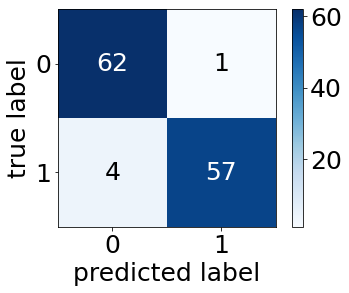

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [2108 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121
 2122 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135
 2136 2137 2138 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149
 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163
 2164 2165 2166 2167 2168 2355 2356 2357 2358 2359 2360 2361 2362 2363
 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374 2375 2376 2377
 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388 2389 2390 2391
 2392 2393 2394 2395 2396 2397 2398 2399 2400 2401 2402 2403 2404 2405
 2406 2407 2408 2409 2410 2411 2412 2413 2414 2415 2416 2417]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.92      0.98      0.95        61

    accuracy                           0.95       124
   macro avg       0.95      0.95      0.95       124
weighted avg       0.95      0.95      0.95      

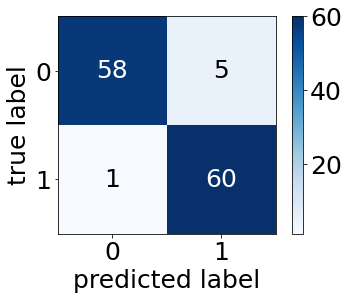

TRAIN: [   0    1    2 ... 2415 2416 2417] TEST: [2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182
 2183 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195 2196
 2197 2198 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210
 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224
 2225 2226 2227 2228 2229 2418 2419 2420 2421 2422 2423 2424 2425 2426
 2427 2428 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439 2440
 2441 2442 2443 2444 2445 2446 2447 2448 2449 2450 2451 2452 2453 2454
 2455 2456 2457 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467 2468
 2469 2470 2471 2472 2473 2474 2475 2476 2477 2478 2479 2480]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.98      0.99        61

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99      

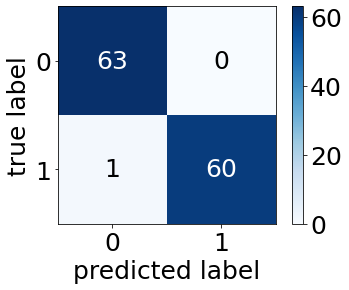

[0.984, 0.9274193548387096, 0.9193548387096774, 0.8709677419354839, 0.8790322580645161, 0.9435483870967742, 0.9354838709677419, 0.967741935483871, 0.9758064516129032, 0.9354838709677419, 0.9274193548387096, 0.9435483870967742, 0.9596774193548387, 0.8870967741935484, 0.9838709677419355, 0.9758064516129032, 0.9758064516129032, 0.9596774193548387, 0.9516129032258065, 0.9919354838709677]
[array([0.98412698, 0.98387097]), array([0.91935484, 0.93548387]), array([0.83870968, 1.        ]), array([0.85483871, 0.88709677]), array([0.87096774, 0.88709677]), array([0.9516129 , 0.93548387]), array([0.91935484, 0.9516129 ]), array([0.9516129 , 0.98387097]), array([0.98387097, 0.96774194]), array([0.95238095, 0.91803279]), array([0.95238095, 0.90163934]), array([0.92063492, 0.96721311]), array([0.96825397, 0.95081967]), array([0.84126984, 0.93442623]), array([0.96825397, 1.        ]), array([0.98412698, 0.96721311]), array([1.        , 0.95081967]), array([0.98412698, 0.93442623]), array([0.92063492,

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef
#from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
skf = StratifiedKFold(n_splits=20)
skf.get_n_splits(X, y)

#print(skf)
accuracy=[]
pre=[]
rec=[]
F1=[]
mcc=[]
kappa=[]
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    model8.fit(X_train1, y_train1)
    y_pred8 = model8.predict(X_test1)
    scores = accuracy_score(y_pred8,y_test1)    
    scores1=precision_score(y_pred8,y_test1, average=None)
    scores2=recall_score(y_pred8,y_test1, average=None)
    scores3=f1_score(y_pred8,y_test1, average=None)
    
    accuracy.append(scores)
    pre.append(scores1)
    rec.append(scores2)
    F1.append(scores3)
    matrix=classification_report(y_test1, y_pred8)

    print(matrix)
    matrix1=confusion_matrix(y_test1, y_pred8)
    plt.rcParams.update({'font.size': 25})
    fig, ax = plot_confusion_matrix(conf_mat=matrix1,
                                    colorbar=True,
                                    show_absolute=True,
                                    show_normed=False
                                    )
    plt.show()
    mcc_scores=matthews_corrcoef (y_test1, y_pred8)
    kappa_scores=cohen_kappa_score(y_test1, y_pred8)
    mcc.append(mcc_scores)
    kappa.append(kappa_scores)
print(accuracy)
print(pre)
print(rec)
print(F1)
print(mcc)
print(kappa)

In [ ]:
np.array(accuracy).mean(),np.array(pre).mean(), np.array(rec).mean(), np.array(F1).mean(), np.array(mcc).mean(), np.array(kappa).mean()

(0.9447645161290325,
 0.9447643600010075,
 0.9459675068867318,
 0.944710896668058,
 0.8907276435248708,
 0.8895276266645915)

TRAIN: [  82   83   84 ... 2478 2479 2480] TEST: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81  983  984
  985  986  987  988  989  990  991  992  993  994  995  996  997  998
  999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012
 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026
 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040
 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054
 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        84

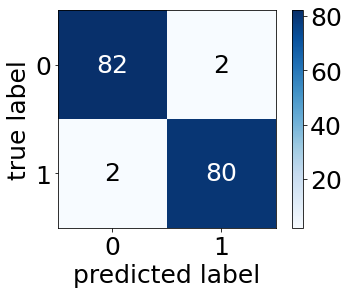

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [  82   83   84   85   86   87   88   89   90   91   92   93   94   95
   96   97   98   99  100  101  102  103  104  105  106  107  108  109
  110  111  112  113  114  115  116  117  118  119  120  121  122  123
  124  125  126  127  128  129  130  131  132  133  134  135  136  137
  138  139  140  141  142  143  144  145  146  147  148  149  150  151
  152  153  154  155  156  157  158  159  160  161  162  163 1067 1068
 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082
 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096
 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110
 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124
 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138
 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        84

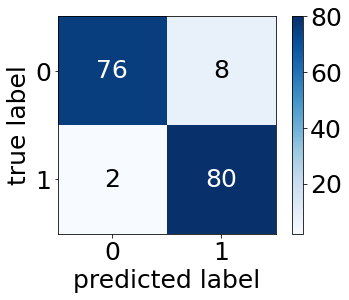

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 164  165  166  167  168  169  170  171  172  173  174  175  176  177
  178  179  180  181  182  183  184  185  186  187  188  189  190  191
  192  193  194  195  196  197  198  199  200  201  202  203  204  205
  206  207  208  209  210  211  212  213  214  215  216  217  218  219
  220  221  222  223  224  225  226  227  228  229  230  231  232  233
  234  235  236  237  238  239  240  241  242  243  244  245 1151 1152
 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166
 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180
 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194
 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208
 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222
 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        84

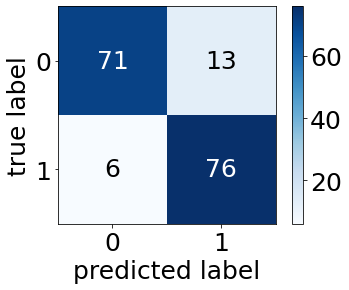

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327 1235 1236
 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250
 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264
 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278
 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292
 1293 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306
 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        84

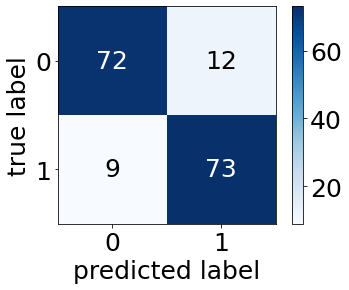

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 328  329  330  331  332  333  334  335  336  337  338  339  340  341
  342  343  344  345  346  347  348  349  350  351  352  353  354  355
  356  357  358  359  360  361  362  363  364  365  366  367  368  369
  370  371  372  373  374  375  376  377  378  379  380  381  382  383
  384  385  386  387  388  389  390  391  392  393  394  395  396  397
  398  399  400  401  402  403  404  405  406  407  408  409 1319 1320
 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334
 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348
 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362
 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376
 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390
 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84

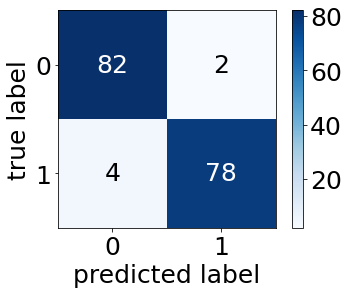

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 410  411  412  413  414  415  416  417  418  419  420  421  422  423
  424  425  426  427  428  429  430  431  432  433  434  435  436  437
  438  439  440  441  442  443  444  445  446  447  448  449  450  451
  452  453  454  455  456  457  458  459  460  461  462  463  464  465
  466  467  468  469  470  471  472  473  474  475  476  477  478  479
  480  481  482  483  484  485  486  487  488  489  490  491 1403 1404
 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418
 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432
 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446
 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460
 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 1474
 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        84

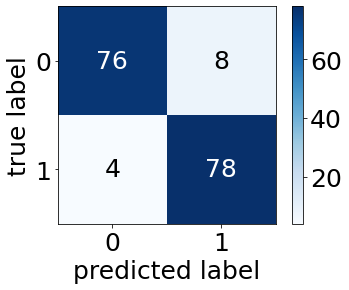

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 492  493  494  495  496  497  498  499  500  501  502  503  504  505
  506  507  508  509  510  511  512  513  514  515  516  517  518  519
  520  521  522  523  524  525  526  527  528  529  530  531  532  533
  534  535  536  537  538  539  540  541  542  543  544  545  546  547
  548  549  550  551  552  553  554  555  556  557  558  559  560  561
  562  563  564  565  566  567  568  569  570  571  572  573 1487 1488
 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499 1500 1501 1502
 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515 1516
 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527 1528 1529 1530
 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541 1542 1543 1544
 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555 1556 1557 1558
 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        83
    

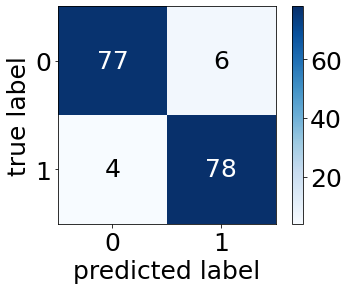

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 574  575  576  577  578  579  580  581  582  583  584  585  586  587
  588  589  590  591  592  593  594  595  596  597  598  599  600  601
  602  603  604  605  606  607  608  609  610  611  612  613  614  615
  616  617  618  619  620  621  622  623  624  625  626  627  628  629
  630  631  632  633  634  635  636  637  638  639  640  641  642  643
  644  645  646  647  648  649  650  651  652  653  654  655 1570 1571
 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583 1584 1585
 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598 1599
 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613
 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627
 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641
 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        83
    

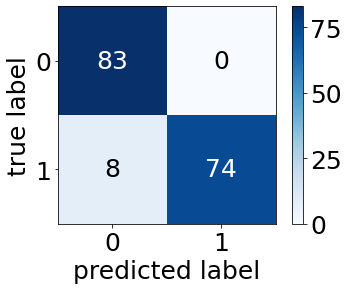

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 656  657  658  659  660  661  662  663  664  665  666  667  668  669
  670  671  672  673  674  675  676  677  678  679  680  681  682  683
  684  685  686  687  688  689  690  691  692  693  694  695  696  697
  698  699  700  701  702  703  704  705  706  707  708  709  710  711
  712  713  714  715  716  717  718  719  720  721  722  723  724  725
  726  727  728  729  730  731  732  733  734  735  736  737 1653 1654
 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668
 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682
 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696
 1697 1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710
 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724
 1725 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        83
    

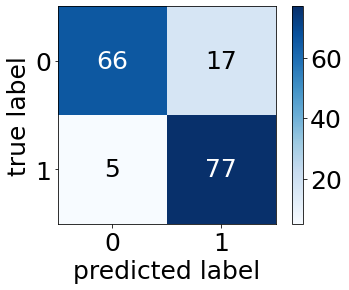

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 738  739  740  741  742  743  744  745  746  747  748  749  750  751
  752  753  754  755  756  757  758  759  760  761  762  763  764  765
  766  767  768  769  770  771  772  773  774  775  776  777  778  779
  780  781  782  783  784  785  786  787  788  789  790  791  792  793
  794  795  796  797  798  799  800  801  802  803  804  805  806  807
  808  809  810  811  812  813  814  815  816  817  818  819 1736 1737
 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751
 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765
 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779
 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793
 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806 1807
 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        83
    

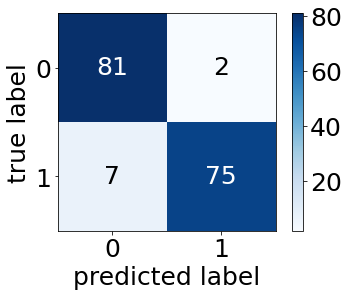

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901 1819 1820
 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834
 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848
 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862
 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876
 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890
 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        83
    

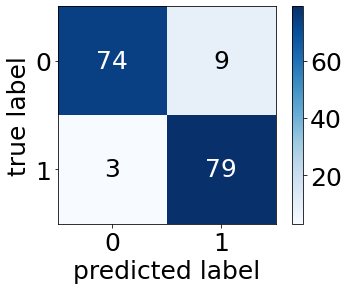

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 902  903  904  905  906  907  908  909  910  911  912  913  914  915
  916  917  918  919  920  921  922  923  924  925  926  927  928  929
  930  931  932  933  934  935  936  937  938  939  940  941  942  943
  944  945  946  947  948  949  950  951  952  953  954  955  956  957
  958  959  960  961  962  963  964  965  966  967  968  969  970  971
  972  973  974  975  976  977  978  979  980  981  982 1902 1903 1904
 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918
 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932
 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946
 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 2230]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98        83
    

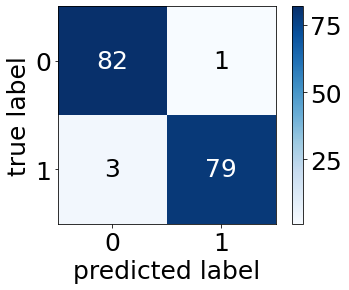

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026
 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040
 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054
 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2231 2232
 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246
 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260
 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274
 2275 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288
 2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302
 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        83
    

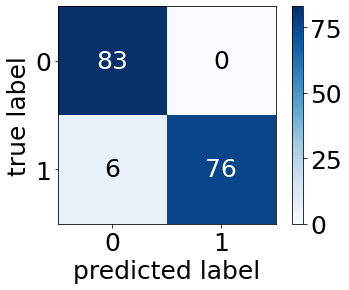

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080
 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094
 2095 2096 2097 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108
 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122
 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136
 2137 2138 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148 2314 2315
 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329
 2330 2331 2332 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343
 2344 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357
 2358 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371
 2372 2373 2374 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385
 2386 2387 2388 2389 2390 2391 2392 2393 2394 2395 2396]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        83
    

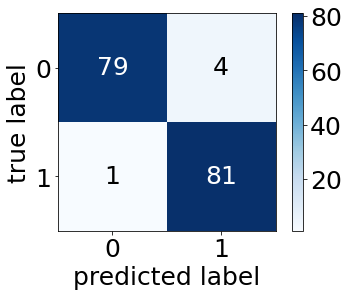

TRAIN: [   0    1    2 ... 2394 2395 2396] TEST: [2149 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162
 2163 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176
 2177 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190
 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204
 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218
 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2397 2398 2399
 2400 2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411 2412 2413
 2414 2415 2416 2417 2418 2419 2420 2421 2422 2423 2424 2425 2426 2427
 2428 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439 2440 2441
 2442 2443 2444 2445 2446 2447 2448 2449 2450 2451 2452 2453 2454 2455
 2456 2457 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467 2468 2469
 2470 2471 2472 2473 2474 2475 2476 2477 2478 2479 2480]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
    

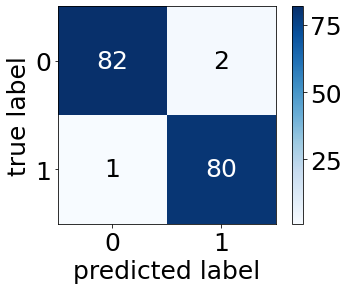

[0.9759036144578314, 0.9397590361445783, 0.8855421686746988, 0.8734939759036144, 0.963855421686747, 0.927710843373494, 0.9393939393939394, 0.9515151515151515, 0.8666666666666667, 0.9454545454545454, 0.9272727272727272, 0.9757575757575757, 0.9636363636363636, 0.9696969696969697, 0.9818181818181818]
[array([0.97619048, 0.97560976]), array([0.9047619 , 0.97560976]), array([0.8452381 , 0.92682927]), array([0.85714286, 0.8902439 ]), array([0.97619048, 0.95121951]), array([0.9047619 , 0.95121951]), array([0.92771084, 0.95121951]), array([1.        , 0.90243902]), array([0.79518072, 0.93902439]), array([0.97590361, 0.91463415]), array([0.89156627, 0.96341463]), array([0.98795181, 0.96341463]), array([1.        , 0.92682927]), array([0.95180723, 0.98780488]), array([0.97619048, 0.98765432])]
[array([0.97619048, 0.97560976]), array([0.97435897, 0.90909091]), array([0.92207792, 0.85393258]), array([0.88888889, 0.85882353]), array([0.95348837, 0.975     ]), array([0.95      , 0.90697674]), array(

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef
#from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
skf = StratifiedKFold(n_splits=15)
skf.get_n_splits(X, y)

#print(skf)
accuracy=[]
pre=[]
rec=[]
F1=[]
mcc=[]
kappa=[]
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    model8.fit(X_train1, y_train1)
    y_pred8 = model8.predict(X_test1)
    scores = accuracy_score(y_pred8,y_test1)    
    scores1=precision_score(y_pred8,y_test1, average=None)
    scores2=recall_score(y_pred8,y_test1, average=None)
    scores3=f1_score(y_pred8,y_test1, average=None)
    
    accuracy.append(scores)
    pre.append(scores1)
    rec.append(scores2)
    F1.append(scores3)
    matrix=classification_report(y_test1, y_pred8)

    print(matrix)
    matrix1=confusion_matrix(y_test1, y_pred8)
    plt.rcParams.update({'font.size': 25})
    fig, ax = plot_confusion_matrix(conf_mat=matrix1,
                                    colorbar=True,
                                    show_absolute=True,
                                    show_normed=False
                                    )
    plt.show()
    mcc_scores=matthews_corrcoef (y_test1, y_pred8)
    kappa_scores=cohen_kappa_score(y_test1, y_pred8)
    mcc.append(mcc_scores)
    kappa.append(kappa_scores)
print(accuracy)
print(pre)
print(rec)
print(F1)
print(mcc)
print(kappa)

In [ ]:
np.array(accuracy).mean(),np.array(pre).mean(), np.array(rec).mean(), np.array(F1).mean(), np.array(mcc).mean(), np.array(kappa).mean()


(0.9391651454302058,
 0.9392587729504502,
 0.9408826942431273,
 0.9390891162219454,
 0.8801373688914339,
 0.8783663201962862)

TRAIN: [ 123  124  125 ... 2478 2479 2480] TEST: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  983  984  985
  986  987  988  989  990  991  992  993  994  995  996  997  998  999
 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 10

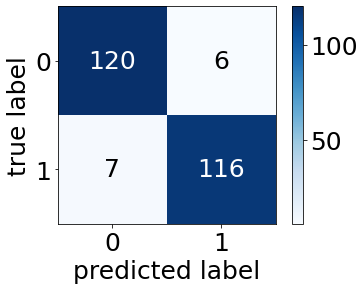

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 123  124  125  126  127  128  129  130  131  132  133  134  135  136
  137  138  139  140  141  142  143  144  145  146  147  148  149  150
  151  152  153  154  155  156  157  158  159  160  161  162  163  164
  165  166  167  168  169  170  171  172  173  174  175  176  177  178
  179  180  181  182  183  184  185  186  187  188  189  190  191  192
  193  194  195  196  197  198  199  200  201  202  203  204  205  206
  207  208  209  210  211  212  213  214  215  216  217  218  219  220
  221  222  223  224  225  226  227  228  229  230  231  232  233  234
  235  236  237  238  239  240  241  242  243  244  245 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 11

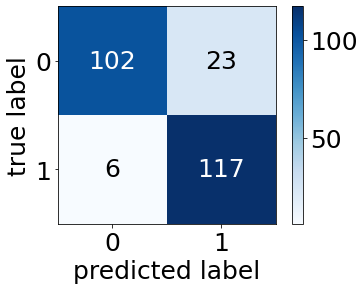

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343
  344  345  346  347  348  349  350  351  352  353  354  355  356  357
  358  359  360  361  362  363  364  365  366  367  368 1234 1235 1236
 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250
 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264
 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278
 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292
 1293 1294 1295 1296 1297 12

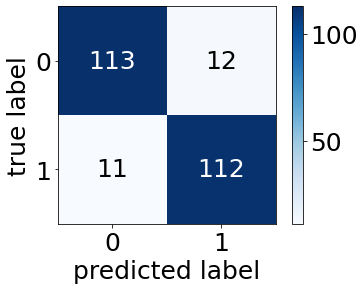

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 369  370  371  372  373  374  375  376  377  378  379  380  381  382
  383  384  385  386  387  388  389  390  391  392  393  394  395  396
  397  398  399  400  401  402  403  404  405  406  407  408  409  410
  411  412  413  414  415  416  417  418  419  420  421  422  423  424
  425  426  427  428  429  430  431  432  433  434  435  436  437  438
  439  440  441  442  443  444  445  446  447  448  449  450  451  452
  453  454  455  456  457  458  459  460  461  462  463  464  465  466
  467  468  469  470  471  472  473  474  475  476  477  478  479  480
  481  482  483  484  485  486  487  488  489  490  491 1359 1360 1361
 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375
 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389
 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403
 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417
 1418 1419 1420 1421 1422 14

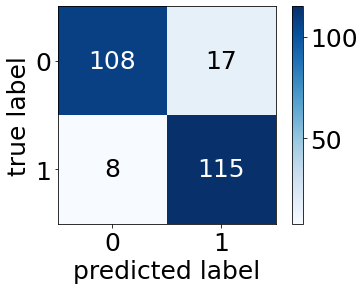

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 492  493  494  495  496  497  498  499  500  501  502  503  504  505
  506  507  508  509  510  511  512  513  514  515  516  517  518  519
  520  521  522  523  524  525  526  527  528  529  530  531  532  533
  534  535  536  537  538  539  540  541  542  543  544  545  546  547
  548  549  550  551  552  553  554  555  556  557  558  559  560  561
  562  563  564  565  566  567  568  569  570  571  572  573  574  575
  576  577  578  579  580  581  582  583  584  585  586  587  588  589
  590  591  592  593  594  595  596  597  598  599  600  601  602  603
  604  605  606  607  608  609  610  611  612  613  614 1484 1485 1486
 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499 1500
 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513 1514
 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527 1528
 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541 1542
 1543 1544 1545 1546 1547 15

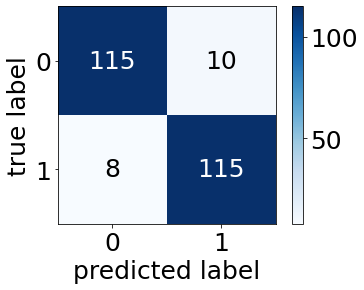

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 615  616  617  618  619  620  621  622  623  624  625  626  627  628
  629  630  631  632  633  634  635  636  637  638  639  640  641  642
  643  644  645  646  647  648  649  650  651  652  653  654  655  656
  657  658  659  660  661  662  663  664  665  666  667  668  669  670
  671  672  673  674  675  676  677  678  679  680  681  682  683  684
  685  686  687  688  689  690  691  692  693  694  695  696  697  698
  699  700  701  702  703  704  705  706  707  708  709  710  711  712
  713  714  715  716  717  718  719  720  721  722  723  724  725  726
  727  728  729  730  731  732  733  734  735  736  737 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 1654 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667
 1668 1669 1670 1671 1672 16

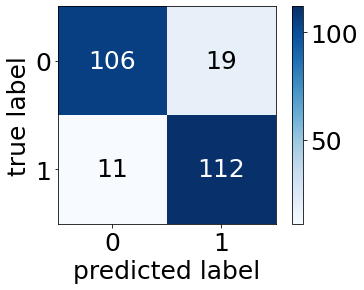

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 738  739  740  741  742  743  744  745  746  747  748  749  750  751
  752  753  754  755  756  757  758  759  760  761  762  763  764  765
  766  767  768  769  770  771  772  773  774  775  776  777  778  779
  780  781  782  783  784  785  786  787  788  789  790  791  792  793
  794  795  796  797  798  799  800  801  802  803  804  805  806  807
  808  809  810  811  812  813  814  815  816  817  818  819  820  821
  822  823  824  825  826  827  828  829  830  831  832  833  834  835
  836  837  838  839  840  841  842  843  844  845  846  847  848  849
  850  851  852  853  854  855  856  857  858  859  860 1734 1735 1736
 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750
 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764
 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778
 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792
 1793 1794 1795 1796 1797 17

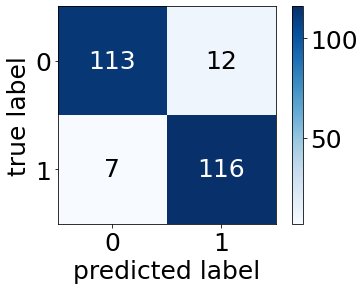

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [ 861  862  863  864  865  866  867  868  869  870  871  872  873  874
  875  876  877  878  879  880  881  882  883  884  885  886  887  888
  889  890  891  892  893  894  895  896  897  898  899  900  901  902
  903  904  905  906  907  908  909  910  911  912  913  914  915  916
  917  918  919  920  921  922  923  924  925  926  927  928  929  930
  931  932  933  934  935  936  937  938  939  940  941  942  943  944
  945  946  947  948  949  950  951  952  953  954  955  956  957  958
  959  960  961  962  963  964  965  966  967  968  969  970  971  972
  973  974  975  976  977  978  979  980  981  982 1859 1860 1861 1862
 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876
 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890
 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904
 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918
 1919 1920 1921 1922 1923 19

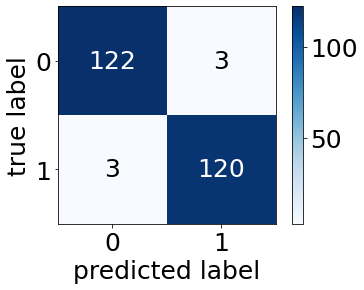

TRAIN: [   0    1    2 ... 2478 2479 2480] TEST: [1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026
 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040
 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054
 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068
 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082
 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096
 2097 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2230 2231 2232
 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246
 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260
 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274
 2275 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288
 2289 2290 2291 2292 2293 22

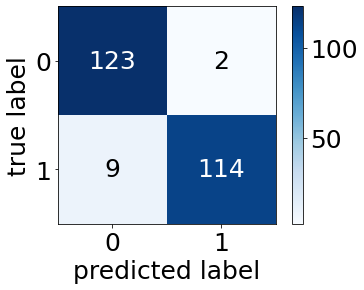

TRAIN: [   0    1    2 ... 2352 2353 2354] TEST: [2108 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121
 2122 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135
 2136 2137 2138 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149
 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163
 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177
 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191
 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204 2205
 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219
 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2355 2356 2357 2358
 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372
 2373 2374 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386
 2387 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397 2398 2399 2400
 2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411 2412 2413 2414
 2415 2416 2417 2418 2419 24

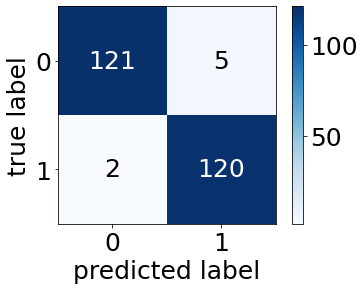

[0.9477911646586346, 0.8830645161290323, 0.907258064516129, 0.8991935483870968, 0.9274193548387096, 0.8790322580645161, 0.9233870967741935, 0.9758064516129032, 0.9556451612903226, 0.9717741935483871]
[array([0.95238095, 0.94308943]), array([0.816     , 0.95121951]), array([0.904     , 0.91056911]), array([0.864     , 0.93495935]), array([0.92      , 0.93495935]), array([0.848     , 0.91056911]), array([0.904     , 0.94308943]), array([0.976     , 0.97560976]), array([0.984     , 0.92682927]), array([0.96031746, 0.98360656])]
[array([0.94488189, 0.95081967]), array([0.94444444, 0.83571429]), array([0.91129032, 0.90322581]), array([0.93103448, 0.87121212]), array([0.93495935, 0.92      ]), array([0.90598291, 0.85496183]), array([0.94166667, 0.90625   ]), array([0.976     , 0.97560976]), array([0.93181818, 0.98275862]), array([0.98373984, 0.96      ])]
[array([0.9486166 , 0.94693878]), array([0.87553648, 0.88973384]), array([0.90763052, 0.90688259]), array([0.89626556, 0.90196078]), array

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef
#from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

#print(skf)
accuracy=[]
pre=[]
rec=[]
F1=[]
mcc=[]
kappa=[]
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    model8.fit(X_train1, y_train1)
    y_pred8 = model8.predict(X_test1)
    scores = accuracy_score(y_pred8,y_test1)    
    scores1=precision_score(y_pred8,y_test1, average=None)
    scores2=recall_score(y_pred8,y_test1, average=None)
    scores3=f1_score(y_pred8,y_test1, average=None)
    
    accuracy.append(scores)
    pre.append(scores1)
    rec.append(scores2)
    F1.append(scores3)
    matrix=classification_report(y_test1, y_pred8)

    print(matrix)
    matrix1=confusion_matrix(y_test1, y_pred8)
    plt.rcParams.update({'font.size': 25})
    fig, ax = plot_confusion_matrix(conf_mat=matrix1,
                                    colorbar=True,
                                    show_absolute=True,
                                    show_normed=False
                                    )
    plt.show()
    mcc_scores=matthews_corrcoef (y_test1, y_pred8)
    kappa_scores=cohen_kappa_score(y_test1, y_pred8)
    mcc.append(mcc_scores)
    kappa.append(kappa_scores)
print(accuracy)
print(pre)
print(rec)
print(F1)
print(mcc)
print(kappa)

In [ ]:
np.array(accuracy).mean(),np.array(pre).mean(), np.array(rec).mean(), np.array(F1).mean(), np.array(mcc).mean(), np.array(kappa).mean()

(0.9270371809819926,
 0.9271599639509274,
 0.9283185087682284,
 0.9269704509500686,
 0.8554753024771827,
 0.8541183702471379)

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef
#from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

#print(skf)
accuracy=[]
pre=[]
rec=[]
F1=[]
mcc=[]
kappa=[]
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    model8.fit(X_train1, y_train1)
    y_pred8 = model8.predict(X_test1)
    scores = accuracy_score(y_pred8,y_test1)    
    scores1=precision_score(y_pred8,y_test1, average=None)
    scores2=recall_score(y_pred8,y_test1, average=None)
    scores3=f1_score(y_pred8,y_test1, average=None)
    
    accuracy.append(scores)
    pre.append(scores1)
    rec.append(scores2)
    F1.append(scores3)
    matrix=classification_report(y_test1, y_pred8)

    print(matrix)
    matrix1=confusion_matrix(y_test1, y_pred8)
    plt.rcParams.update({'font.size': 25})
    fig, ax = plot_confusion_matrix(conf_mat=matrix1,
                                    colorbar=True,
                                    show_absolute=True,
                                    show_normed=False
                                    )
    plt.show()
    mcc_scores=matthews_corrcoef (y_test1, y_pred8)
    kappa_scores=cohen_kappa_score(y_test1, y_pred8)
    mcc.append(mcc_scores)
    kappa.append(kappa_scores)
print(accuracy)
print(pre)
print(rec)
print(F1)
print(mcc)
print(kappa)

In [ ]:
np.array(accuracy).mean(),np.array(pre).mean(), np.array(rec).mean(), np.array(F1).mean(), np.array(mcc).mean(), np.array(kappa).mean()


It's Non-COVID


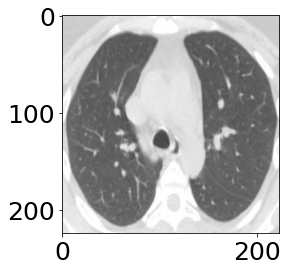

It's Non-COVID


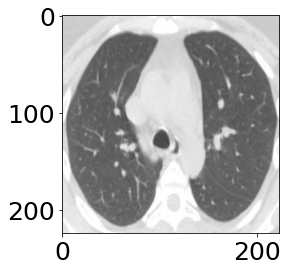

In [ ]:
img_path="/content/drive/MyDrive/Covid-CT-Scan-80-20/val/non-COVID/Non-Covid (1023).png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.resize(img, (H, W))
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
FC_output = FC_layer_model.predict(img)
image_features=pd.DataFrame(data=FC_output,columns=feature_col)
predictions = model8.predict(image_features)
if predictions[0]== 0:
  print("It's COVID")
else:
  print("It's Non-COVID")

